## Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("/content/data1.csv")
df.head()

,date,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,5-Jan-09,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,6-Jan-09,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,7-Jan-09,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,8-Jan-09,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,9-Jan-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [ ]:
df['date'] = pd.to_datetime(df['date'])


## Plot of ISE vs Date

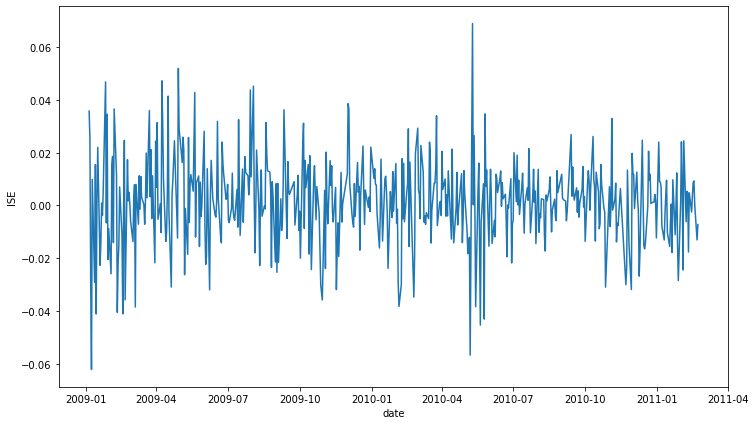

In [ ]:
plt.figure(figsize=(12,7))
sns.lineplot(x='date',y='ISE',data=df)
plt.show()

## Transforming the data

In [ ]:
df.drop(columns=['SP','ISE.1','DAX','FTSE','NIKKEI','BOVESPA','EU','EM'],inplace=True)
df.date = pd.to_datetime(df.date, dayfirst = True)
df.set_index("date", inplace=True)
df=df.asfreq('b')
df=df.fillna(method='ffill')
df.head()

,ISE
date,
2009-01-05,0.035754
2009-01-06,0.025426
2009-01-07,-0.028862
2009-01-08,-0.062208
2009-01-09,0.009860


## For a time series to be weak form stationarity/covariance stationarity, it should have:

1. Constant mean  
2. Constant variance
3. Consistent covariance



In [ ]:
df.describe()

,ISE
count,557.000000
mean,0.001611
std,0.016220
min,-0.062208
25%,-0.006520
50%,0.002217
75%,0.010203
max,0.068952



### An example of weak-form stationarity is white noise, as it follows the following conditions:

1.   Mean = 0
2.   constant variance
3.   autocorrelation between lags is 0

### 1. Mean comes out to be almost equal to zero
### Standard deviation is also almost equal to zero
### This leads to the assumption that this time series is white noise



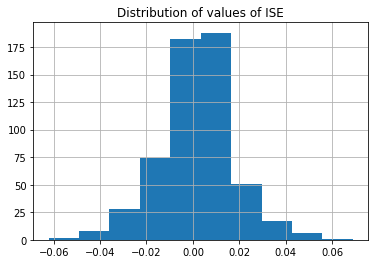

In [ ]:
df.hist()
plt.title("Distribution of values of ISE")
plt.show()

### The Histogram proves how the mean is close to zero and that it follows a Gaussian distribution

### To see if the time series has constant variance we split the data and check for the mean and variance

In [ ]:
a = round(len(df)/2)
data1 = df[:a]
data2 = df[a:]
print('Mean of first half of data: %f'%data1.mean())
print('Mean of second half of data: %f'%data2.mean())
print('Variance of first half of data: %f'%data1.var())
print('Variance of second half of data: %f'%data2.var())

Mean of first half of data: 0.002663
Mean of second half of data: 0.000562
Variance of first half of data: 0.000310
Variance of second half of data: 0.000215


###2. It is seen that the variance is constant among the 2 halves of data
### Hence the data is seen to satisfy the 2nd assumption of white noise as well

### **Autocorrelation Plot**

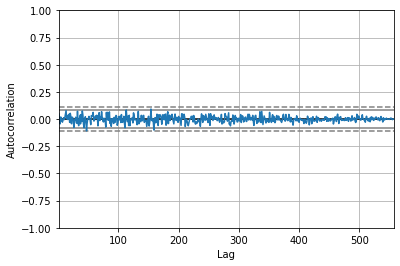

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.ISE)

### Clearly all the autocorrelation values are close to zero proving the time series is random and there is no autocorrelation between values
### Hence it is white noise

## **Seasonality**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

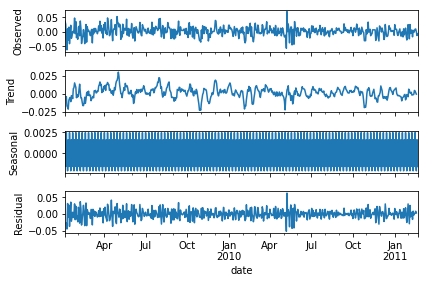

In [ ]:
s_dec_additive = seasonal_decompose(x=df.ISE,model='additive')
s_dec_additive.plot()
plt.show()

### Here from the above graphs we can see that:

1.   The trend resembles the observed graph and has no clear positive or negative incline
2.   The seasonal sequence has no clear pattern, hence there is no pattern in graph
3.   Residual also has no fixed pattern as well

### Hence there is no seasonality in the above time series



In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

## **Ad Fuller for Stationarity**

In [ ]:
def ad_fuller_test(sales):
  results = adfuller(sales)
  labels = ['Test Statistic','p-value','Number of lags used','Number of Observations','Critical Value']
  for values, labels in zip(results,labels):
    print(labels,' : ',str(values))

In [ ]:
ad_fuller_test(df['ISE'])

Test Statistic  :  -22.45961680335764
p-value  :  0.0
Number of lags used  :  0
Number of Observations  :  556
Critical Value  :  {'1%': -3.4421660928041633, '5%': -2.8667523104859627, '10%': -2.56954599309042}


### As p<0.05, hence the null hypothesis is rejected, the data is stationary
1.   Test statistic is less than all of 1%, 5%, 10% values 
2.   p-value is 0
3.   As it is white noise and there is no autocorrelation among the values of the time series, hence lags=0
4. The time series is stationary and further confirms that the series is white noise



## **ACF Plot**
### Plotting the graph from 1st lag as for the 0th lag, correlation between and itself will be 1

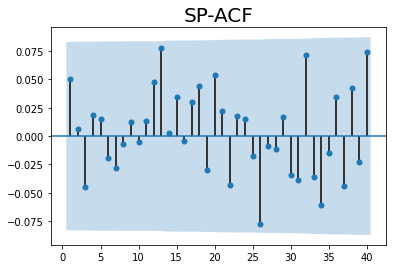

In [ ]:
sm.graphics.tsa.plot_acf(df.ISE,lags=40,zero=False)
plt.title('SP-ACF',size=20)
plt.show()

### All the lines fall within the blue area of significance, suggesting that the coefficients are not significant, hence there is no autocorrelation between lags

## **PACF Plot**
### Again,plotting the graph from 1st lag as for the 0th lag, correlation between and itself will be 1

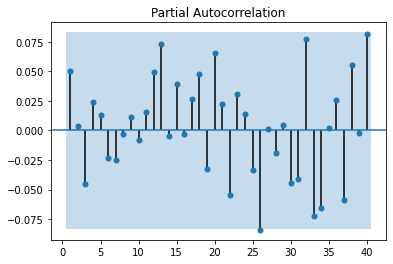

In [ ]:
sm.graphics.tsa.plot_pacf(df.ISE,lags=40,zero=False)
plt.show()

### Same as ACF Plot, there is no partial correlation among lags which proves our assumptions of white noise

### ---------------------------------------------------------------------------

### If a time series is white noise it is not forecastable by definition (because its values at different times are statistically independent) 
### The above statement is proven by fitting to an ARIMA model

In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 11.3MB/s 
     |████████████████████████████████| 9.5MB 42.9MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


## **Train Test Split**

In [ ]:
n = len(df)
p = round(n*0.80)
train_data = df.iloc[:p]
test_data = df.iloc[p:]
print(len(train_data),len(test_data))

446 111


## **Finding Best (p,d,q) fit using auto_arima** 

In [ ]:
from pmdarima import auto_arima
best_fit = auto_arima(df['ISE'],trace=True)
best_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-3002.646, Time=0.69 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3007.686, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-3007.120, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-3007.098, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3004.210, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-3005.122, Time=0.14 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.240 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  557
Model:                        SARIMAX   Log Likelihood                1505.843
Date:                Thu, 08 Jul 2021   AIC                          -3007.686
Time:                        13:13:22   BIC                          -2999.041
Sample:                             0   HQIC                         -3004.309
                                - 557                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0016      0.001      2.341      0.019       0.000       0.003
sigma2         0.0003   1.21e-05     21.641      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       33.21   Jarque-Bera (JB):                45.27
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## **ARIMA(0,0,0)**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model = ARIMA(train_data['ISE'],order=(0,0,0))
model_ISE=model.fit()
model_ISE.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    ISE   No. Observations:                  446
Model:                     ARMA(0, 0)   Log Likelihood                1189.795
Method:                           css   S.D. of innovations              0.017
Date:                Thu, 08 Jul 2021   AIC                          -2375.591
Time:                        13:13:22   BIC                          -2367.390
Sample:                    01-05-2009   HQIC                         -2372.357
                         - 09-20-2010                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.001      2.616      0.009       0.001       0.004
==============================================================================
"""

In [ ]:
df['auto_arima_ISE']=model_ISE.predict(start=len(train_data),end=556,dynamic=True)

## **Plot**

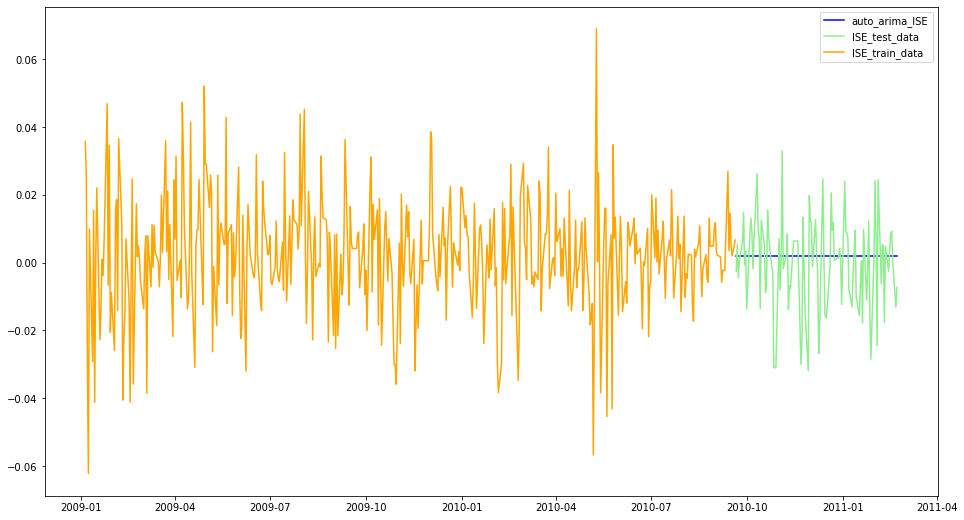

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(df['auto_arima_ISE'],color='blue')
plt.plot(test_data['ISE'],color='lightgreen')
plt.plot(train_data['ISE'],color='orange')
plt.legend(['auto_arima_ISE','ISE_test_data','ISE_train_data'])

## Hence the graph proves our assumption that white noise cannot be predicted